**Import Packages**

In [1]:
import os
import time
from datetime import timedelta
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np

**Read Data**

In [2]:
# Note: pd.StringDtype() is not present in pandas 0.25.3, which is required for pandas_profiling pacakage. It is present in pandas 1.0.3.
# Generated profiling reports with pandas 0.25.3 and then switched back to pandas 1.0.3.

data_dir = 'C:/Users/Rishi/Desktop/Revolut/data/'
print(f'Data Files: {os.listdir(data_dir)}')

devices_file = 'rev-devices.csv'
notifications_file = 'rev-notifications.csv'
transactions_file = 'rev-transactions.csv'
users_file = 'rev-users.csv'


start = time.time()

# Read devices data
devices_col_names = ['brand', 'user_id']
devices_col_dtypes = {'brand': pd.StringDtype(), 'user_id': pd.StringDtype()}
# devices_col_dtypes = {'brand': object, 'user_id': object}
devices_df = pd.read_csv(data_dir + devices_file, sep = ',', encoding = 'utf-8', header = 0, names = devices_col_names, \
                         dtype = devices_col_dtypes, skipinitialspace = True)

# Read notifications data
notifications_col_names = ['reason', 'channel', 'status', 'user_id', 'created_date']
notifications_col_dtypes = {'reason': pd.StringDtype(), 'channel': pd.StringDtype(), 'status': pd.StringDtype(), \
                            'user_id': pd.StringDtype(), 'created_date': object}
# notifications_col_dtypes = {'reason': object, 'channel': object, 'status': object, \
#                             'user_id': object, 'created_date': object}
notifications_df = pd.read_csv(data_dir + notifications_file, sep = ',', encoding = 'utf-8', header = 0, names = notifications_col_names, \
                               dtype = notifications_col_dtypes, parse_dates = ['created_date'], infer_datetime_format = True, \
                               skipinitialspace = True)

# Read transactions data
transactions_col_names = ['transaction_id', 'transactions_type', 'transactions_currency', 'amount_usd', 'transactions_state', \
                          'ea_cardholderpresence', 'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country', 'direction', 'user_id', \
                          'created_date']
transactions_col_dtypes = {'transaction_id': pd.StringDtype(), \
                           'transactions_type': pd.StringDtype(), \
                           'transactions_currency': pd.StringDtype(), \
                           'amount_usd': float, \
                           'transactions_state': pd.StringDtype(), \
                           'ea_cardholderpresence': pd.StringDtype(), \
                           'ea_merchant_mcc': float, \
                           'ea_merchant_city': pd.StringDtype(), \
                           'ea_merchant_country': pd.StringDtype(), \
                           'direction': pd.StringDtype(), \
                           'user_id': pd.StringDtype(), \
                           'created_date': object}
# transactions_col_dtypes = {'transaction_id': object, \
#                            'transactions_type': object, \
#                            'transactions_currency': object, \
#                            'amount_usd': float, \
#                            'transactions_state': object, \
#                            'ea_cardholderpresence': object, \
#                            'ea_merchant_mcc': float, \
#                            'ea_merchant_city': object, \
#                            'ea_merchant_country': object, \
#                            'direction': object, \
#                            'user_id': object, \
#                            'created_date': object}
transactions_df = pd.read_csv(data_dir + transactions_file, sep = ',', encoding = 'utf-8', header = 0, names = transactions_col_names, \
                              dtype = transactions_col_dtypes, parse_dates = ['created_date'], infer_datetime_format = True, \
                              skipinitialspace = True)
# transactions_df['ea_merchant_mcc'] = transactions_df['ea_merchant_mcc'].astype('int32')

# Read users data
users_col_names = ['user_id', 'birth_year', 'country', 'city', 'created_date', 'user_settings_crypto_unlocked', 'plan', \
                   'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email', 'num_contacts', \
                   'num_referrals', 'num_successful_referrals']
users_col_dtypes = {'user_id': pd.StringDtype(), \
                    'birth_year': int, \
                    'country': pd.StringDtype(), \
                    'city': pd.StringDtype(), \
                    'created_date': object, \
                    'user_settings_crypto_unlocked': int, \
                    'plan': pd.StringDtype(), \
                    'attributes_notifications_marketing_push': float, \
                    'attributes_notifications_marketing_email': float, \
                    'num_contacts': int, \
                    'num_referrals': int, \
                    'num_successful_referrals': int}
# users_col_dtypes = {'user_id': object, \
#                     'birth_year': int, \
#                     'country': object, \
#                     'city': object, \
#                     'created_date': object, \
#                     'user_settings_crypto_unlocked': int, \
#                     'plan': object, \
#                     'attributes_notifications_marketing_push': float, \
#                     'attributes_notifications_marketing_email': float, \
#                     'num_contacts': int, \
#                     'num_referrals': int, \
#                     'num_successful_referrals': int}
users_df = pd.read_csv(data_dir + users_file, sep = ',', encoding = 'utf-8', header = 0, names = users_col_names, \
                       dtype = users_col_dtypes, parse_dates = ['created_date'], infer_datetime_format = True, \
                       skipinitialspace = True)
# users_df['attributes_notifications_marketing_push'] = users_df['attributes_notifications_marketing_push'].astype('int32')
# users_df['attributes_notifications_marketing_email'] = users_df['attributes_notifications_marketing_email'].astype('int32')

end = time.time()
elapsed = end - start
print(f'Time taken to load data files: {str(timedelta(seconds=elapsed))}')

Data Files: ['rev-devices.csv', 'rev-notifications.csv', 'rev-transactions.csv', 'rev-users.csv']
Time taken to load data files: 0:00:56.554291


In [3]:
# Function to display dataframe statistics
def display_df_stats(df):
    print(f'\nShape: {df.shape}')
    print(f'\nColumns: \n{df.columns}')
    print(f'\nColumn Datatypes: \n{df.dtypes}')
    print(f'\nDescriptive Statistics:')
    print(df.describe(include = 'all'))
    print(f'\nSummary:')
    print(df.info(memory_usage = True, null_counts = True))

# Data Exploration
 
Generated Pandas Profiling Reports in addition to descriptive statistics and summary of each dataframe.
Variables section in each report shows statistics for each variable in that dataframe.

Do click on "Toggle Details" to know more about any specific variable, for example, unique values, frequency distributions, etc.

## Devices

devices.csv

a table of devices associated with a user
- brand : string corresponding to the phone brand
- user_id : string uniquely identifying the user

In [4]:
print(f'Devices Dataframe:')
display_df_stats(devices_df)
devices_df.head()

Devices Dataframe:

Shape: (19430, 2)

Columns: 
Index(['brand', 'user_id'], dtype='object')

Column Datatypes: 
brand      string
user_id    string
dtype: object

Descriptive Statistics:
          brand    user_id
count     19430      19430
unique        3      19430
top     Android  user_3831
freq       9714          1

Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19430 entries, 0 to 19429
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   brand    19430 non-null  string
 1   user_id  19430 non-null  string
dtypes: string(2)
memory usage: 303.7 KB
None


,brand,user_id
0,Android,user_3257
1,Apple,user_6809
2,Android,user_9144
3,Apple,user_3636
4,Android,user_5970


In [8]:
devices_profile = ProfileReport(devices_df, title='Devices Pandas Profiling Report', html={'style':{'full_width':True}})

devices_profile.to_file(output_file="Devices_Pandas_Profiling_Report.html")

devices_profile.to_notebook_iframe()

**Observations**

- Number of Apple (50.0%) and Android (49.8%) brand devices is almost equal.

- No user has multiple brand devices.

## Notifications

notifications.csv

a table of notifications that a user has received
- reason : string indicating the purpose of the notification
- channel : string indicating how the user has been notified
- status : string indicating the status of the notification
- user_id : string uniquely identifying the user
- created_date : datetime indicating when the notification has been sent

In [5]:
print(f'Notifications Dataframe:')
display_df_stats(notifications_df)
notifications_df.head()

Notifications Dataframe:

Shape: (121813, 5)

Columns: 
Index(['reason', 'channel', 'status', 'user_id', 'created_date'], dtype='object')

Column Datatypes: 
reason                  string
channel                 string
status                  string
user_id                 string
created_date    datetime64[ns]
dtype: object

Descriptive Statistics:
                           reason channel  status    user_id  \
count                      121813  121813  121813     121813   
unique                         17       3       2      18953   
top     REENGAGEMENT_ACTIVE_FUNDS   EMAIL    SENT  user_5133   
freq                        35844   61253   89477        289   
first                         NaN     NaN     NaN        NaN   
last                          NaN     NaN     NaN        NaN   

                      created_date  
count                       121813  
unique                      121810  
top     2018-07-15 16:27:12.192706  
freq                             2  
first   2018-0

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6598,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_4151,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1408,2018-12-11 02:04:46.284683
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6292,2018-12-14 17:09:58.900808


In [9]:
notifications_profile = ProfileReport(notifications_df, title='Notifications Pandas Profiling Report', html={'style':{'full_width':True}})

notifications_profile.to_file(output_file="Notifications_Pandas_Profiling_Report.html")

notifications_profile.to_notebook_iframe()

**Observations**

- EMAIL (50.3%) and PUSH (47.4%) are most common notification channels having almost equal representation while SMS is the least common channel.

- A considerable chunk (26.5%) of notifications have FAILED status.

In [6]:
print(f'Notification Reason Values:')
notifications_df['reason'].value_counts()

Notification Reason Values:


REENGAGEMENT_ACTIVE_FUNDS               35844
FIFTH_PAYMENT_PROMO                     23743
NO_INITIAL_CARD_USE                     11221
NO_INITIAL_CARD_ORDER                   11136
METAL_GAME_START                         8373
LOST_CARD_ORDER                          6146
NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER     5459
JOINING_ANNIVERSARY                      4158
MADE_MONEY_REQUEST_NOT_SPLIT_BILL        3506
ONBOARDING_TIPS_ACTIVATED_USERS          3145
ENGAGEMENT_SPLIT_BILL_RESTAURANT         2298
BLACK_FRIDAY                             2109
METAL_RESERVE_PLAN                       1233
PREMIUM_ENGAGEMENT_INACTIVE_CARD         1124
WELCOME_HOME                              950
PUMPKIN_PAYMENT_NOTIFICATION              690
PREMIUM_ENGAGEMENT_FEES_SAVED             678
Name: reason, dtype: Int64

- The values of reason/ purpose of notification are interesting. They could be clubbed into various categories/ accounts such as marketing in form of advertisements and promos, push notifications, etc.

- REENGAGEMENT_ACTIVE_FUNDS (29.4%) is the most common reason. It seems like a notification about active funds in the user's account in an attempt to rengage the user.

## Transactions

transactions.csv

a table with transactions that a user made
- transaction_id : string uniquely identifying the transaction
- transactions_type : string indicating the type of the transaction
- transactions_currency : string indicating the currency of the transaction
- amount_usd : float corresponding to the transaction amount in USD
- transactions_state : string indicating the state of a transaction
    - COMPLETED - the transaction was completed and the user's balance was changed
    - DECLINED/FAILED - the transaction was declined for some reason, usually pertains to insufficient balance
    - REVERTED - the associated transaction was completed first but was then rolled back later in time potentially due to customer reaching out to Revolut
- ea_cardholderpresence : string indicating if the card holder was present when the transaction happened
- ea_merchant_mcc : float corresponding to the Merchant Category Code (MCC)
- ea_merchant_city : string corresponding to the merchant’s city
- ea_merchant_country : string corresponding to the merchant’s country
- direction : string indicating the direction of the transaction
- user_id : string uniquely identifying the user
- created_date : datetime corresponding to the transaction’s created date

In [7]:
print(f'Transactions Dataframe:')
display_df_stats(transactions_df)
transactions_df.head()

Transactions Dataframe:

Shape: (2740075, 12)

Columns: 
Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

Column Datatypes: 
transaction_id                   string
transactions_type                string
transactions_currency            string
amount_usd                      float64
transactions_state               string
ea_cardholderpresence            string
ea_merchant_mcc                 float64
ea_merchant_city                 string
ea_merchant_country              string
direction                        string
user_id                          string
created_date             datetime64[ns]
dtype: object

Descriptive Statistics:
            transaction_id transactions_type transactions_currency  \
count              2740075           2740075            

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.550,COMPLETED,<NA>,nan,<NA>,<NA>,OUTBOUND,user_898,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.500,COMPLETED,FALSE,4111.000,Dubai,ARE,OUTBOUND,user_1652,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.400,COMPLETED,FALSE,5814.000,Dubai,ARE,OUTBOUND,user_1652,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.010,COMPLETED,<NA>,nan,<NA>,<NA>,OUTBOUND,user_1652,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.810,COMPLETED,FALSE,5651.000,Abu Dhabi,ARE,OUTBOUND,user_5509,2019-03-22 05:42:50.316652


In [11]:
transactions_profile = ProfileReport(transactions_df, minimal=True, title='Transactions Pandas Profiling Report', html={'style':{'full_width':True}})

transactions_profile.to_file(output_file="Transactions_Pandas_Profiling_Report.html")

transactions_profile.to_notebook_iframe()

**Observations**

- CARD_PAYMENT (53.9%), TRANSFER (18.3%) and TOPUP (14.2%) are most common transaction types.

- Majority of transactions are in COMPLETED (87.9%) state.

- Majority of transactions are OUTBOUND (80.6%) while the rest of them are INBOUND.

- A lot of merchant city values are possibly garbage values i.e. not names of actual cities, for example, "help.uber.com", "tfl.gov.uk/cp" etc.

- The last recorded transaction created date is 2019-05-16.

Descriptive statistics of all transaction amounts:
count       2740075.000
mean         170322.487
std        96340143.586
min               0.000
25%               2.030
50%               8.510
75%              28.220
max     85106453190.030
Name: amount_usd, dtype: float64

Total Transactions: 2740075 (100.000%)

Transactions with amount = 0: 58604 (2.139%)

Transactions with 0 < amount < 10: 1440263 (52.5629%)

Transactions with 10 <= amount < 100 : 965211 (35.2257%)

Transactions with 100 <= amount < 1k : 254140 (9.2749%)

Transactions with 1k <= amount < 10k : 20520 (0.7489%)

Transactions with 10k <= amount < 100k : 1131 (0.0413%)

Transactions with 100k <= amount < 1m : 86 (0.0031%)

Transactions with 1m <= amount < 10m : 25 (0.0009%)

Transactions with 10m <= amount < 100m : 40 (0.0015%)

Transactions with 100m <= amount < 1b : 36 (0.0013%)

Transactions with 1b <= amount < 10b : 11 (0.0004%)


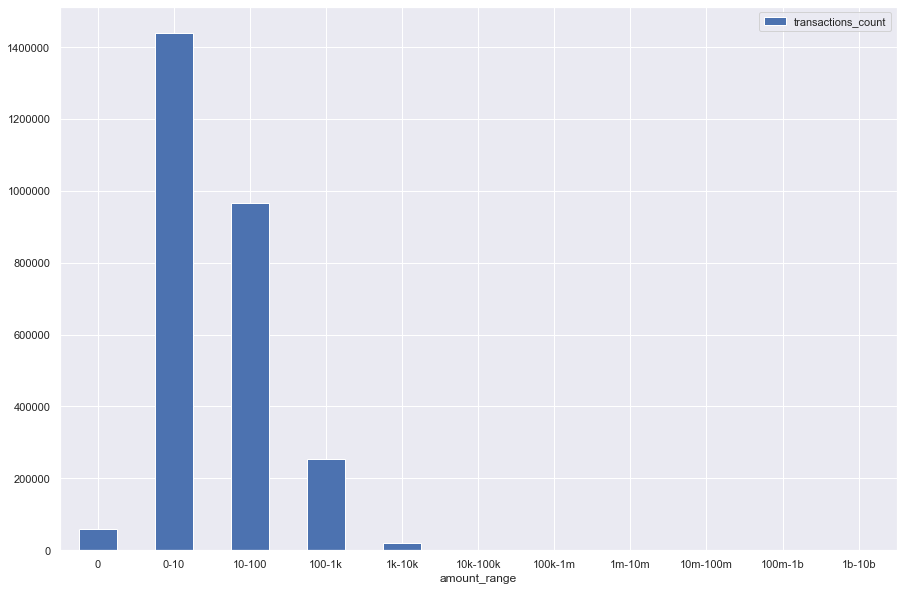

In [8]:
print(f'Descriptive statistics of all transaction amounts:')
print(transactions_df['amount_usd'].describe())

# Count of all transactions with amount bins
total_transactions_count = transactions_df['transaction_id'].nunique()
zero_amount_transactions_count = transactions_df[transactions_df['amount_usd'] == 0.0]['transaction_id'].nunique()
amount_between_0_and_10_transactions_count = transactions_df[(transactions_df['amount_usd'] > 0.0) & (transactions_df['amount_usd'] < 10.0) ]['transaction_id'].nunique()
amount_between_10_and_100_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 10.0) & (transactions_df['amount_usd'] < 100.0) ]['transaction_id'].nunique()
amount_between_100_and_1000_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 100.0) & (transactions_df['amount_usd'] < 1000.0) ]['transaction_id'].nunique()
amount_between_1000_and_10000_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 1000.0) & (transactions_df['amount_usd'] < 10000.0) ]['transaction_id'].nunique()
amount_between_10000_and_100000_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 10000.0) & (transactions_df['amount_usd'] < 100000.0) ]['transaction_id'].nunique()
amount_between_100000_and_1000000_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 100000.0) & (transactions_df['amount_usd'] < 1000000.0) ]['transaction_id'].nunique()
amount_between_1000000_and_10000000_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 1000000.0) & (transactions_df['amount_usd'] < 10000000.0) ]['transaction_id'].nunique()
amount_between_10000000_and_100000000_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 10000000.0) & (transactions_df['amount_usd'] < 100000000.0) ]['transaction_id'].nunique()
amount_between_100000000_and_1000000000_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 100000000.0) & (transactions_df['amount_usd'] < 1000000000.0) ]['transaction_id'].nunique()
amount_between_1000000000_and_10000000000_transactions_count = transactions_df[(transactions_df['amount_usd'] >= 1000000000.0) & (transactions_df['amount_usd'] < 10000000000.0) ]['transaction_id'].nunique()

print(f'\nTotal Transactions: {total_transactions_count} ({"{:.3f}".format(100.*(float(total_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with amount = 0: {zero_amount_transactions_count} ({"{:.3f}".format(100.*(float(zero_amount_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 0 < amount < 10: {amount_between_0_and_10_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_0_and_10_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 10 <= amount < 100 : {amount_between_10_and_100_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_10_and_100_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 100 <= amount < 1k : {amount_between_100_and_1000_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_100_and_1000_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 1k <= amount < 10k : {amount_between_1000_and_10000_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_1000_and_10000_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 10k <= amount < 100k : {amount_between_10000_and_100000_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_10000_and_100000_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 100k <= amount < 1m : {amount_between_100000_and_1000000_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_100000_and_1000000_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 1m <= amount < 10m : {amount_between_1000000_and_10000000_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_1000000_and_10000000_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 10m <= amount < 100m : {amount_between_10000000_and_100000000_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_10000000_and_100000000_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 100m <= amount < 1b : {amount_between_100000000_and_1000000000_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_100000000_and_1000000000_transactions_count)/ float(total_transactions_count)))}%)')
print(f'\nTransactions with 1b <= amount < 10b : {amount_between_1000000000_and_10000000000_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_1000000000_and_10000000000_transactions_count)/ float(total_transactions_count)))}%)')

# Plot histogram of all transaction amount bins
transaction_amount_bins = dict()
transaction_amount_bins['0'] = zero_amount_transactions_count
transaction_amount_bins['0-10'] = amount_between_0_and_10_transactions_count
transaction_amount_bins['10-100'] = amount_between_10_and_100_transactions_count
transaction_amount_bins['100-1k'] = amount_between_100_and_1000_transactions_count
transaction_amount_bins['1k-10k'] = amount_between_1000_and_10000_transactions_count
transaction_amount_bins['10k-100k'] = amount_between_10000_and_100000_transactions_count
transaction_amount_bins['100k-1m'] = amount_between_100000_and_1000000_transactions_count
transaction_amount_bins['1m-10m'] = amount_between_1000000_and_10000000_transactions_count
transaction_amount_bins['10m-100m'] = amount_between_10000000_and_100000000_transactions_count
transaction_amount_bins['100m-1b'] = amount_between_100000000_and_1000000000_transactions_count
transaction_amount_bins['1b-10b'] = amount_between_1000000000_and_10000000000_transactions_count

transaction_amount_bins_data = {'amount_range': list(transaction_amount_bins.keys()), 'transactions_count': list(transaction_amount_bins.values())}
transaction_amount_bins_df = pd.DataFrame.from_dict(transaction_amount_bins_data)
transaction_amount_bins_df.plot.bar(x='amount_range', y='transactions_count', rot=0, figsize=(15,10))

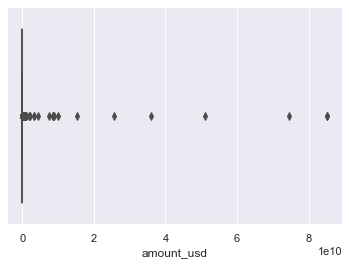

In [9]:
# Box plot for all transaction amounts
sns.boxplot(x=transactions_df['amount_usd'])

In [10]:
print(f'Transactions with 1m <= amount < 10b state value counts:')
print(transactions_df[(transactions_df['amount_usd'] >= 1000000.0) & (transactions_df['amount_usd'] < 10000000000.0) ]['transactions_state'].value_counts())

Transactions with 1m <= amount < 10b state value counts:
DECLINED    112
Name: transactions_state, dtype: Int64


In [11]:
print(f'Transactions with 100k <= amount < 1m state value counts:')
print(transactions_df[(transactions_df['amount_usd'] >= 100000.0) & (transactions_df['amount_usd'] < 1000000.0) ]['transactions_state'].value_counts())

Transactions with 100k <= amount < 1m state value counts:
DECLINED     75
COMPLETED    11
Name: transactions_state, dtype: Int64


- Transactions with 0 < amount < 10: 1440263 (52.5629%) and Transactions with 10 <= amount < 100 : 965211 (35.2257%) constitute the major chunk of all transactions.

- Some transactions exist with 1m <= amount < 10b and all of these transactions exhibit DECLINED transaction state.

- Some transactions exist with 100k <= amount < 1m and 11 of these transactions exhibit COMPLETED transaction state. Not sure if such COMPLETED high amount value transactions are erroneous or false. One possibility could be that they belong to some business account having higher limits.

Let's take a closer look at COMPLETED transactions.

Descriptive statistics of COMPLETED transaction amounts:
count   2407968.000
mean         64.444
std         864.842
min           0.000
25%           2.420
50%           8.510
75%          28.280
max      612766.460
Name: amount_usd, dtype: float64

Note: Percentage values are relative to total count of COMPLETED transactions

Total Completed Transactions: 2407968 (100.000%)

Transactions with amount = 0: 8002 (0.332%)

Transactions with 0 < amount < 10: 1296722 (53.8513%)

Transactions with 10 <= amount < 100 : 863246 (35.8496%)

Transactions with 100 <= amount < 1k : 220711 (9.1659%)

Transactions with 1k <= amount < 10k : 18298 (0.7599%)

Transactions with 10k <= amount < 100k : 978 (0.0406%)

Transactions with 100k <= amount < 1m : 11 (0.0005%)

Transactions with 1m <= amount < 10m : 0 (0.0000%)

Transactions with 10m <= amount < 100m : 0 (0.0000%)

Transactions with 100m <= amount < 1b : 0 (0.0000%)

Transactions with 1b <= amount < 10b : 0 (0.0000%)


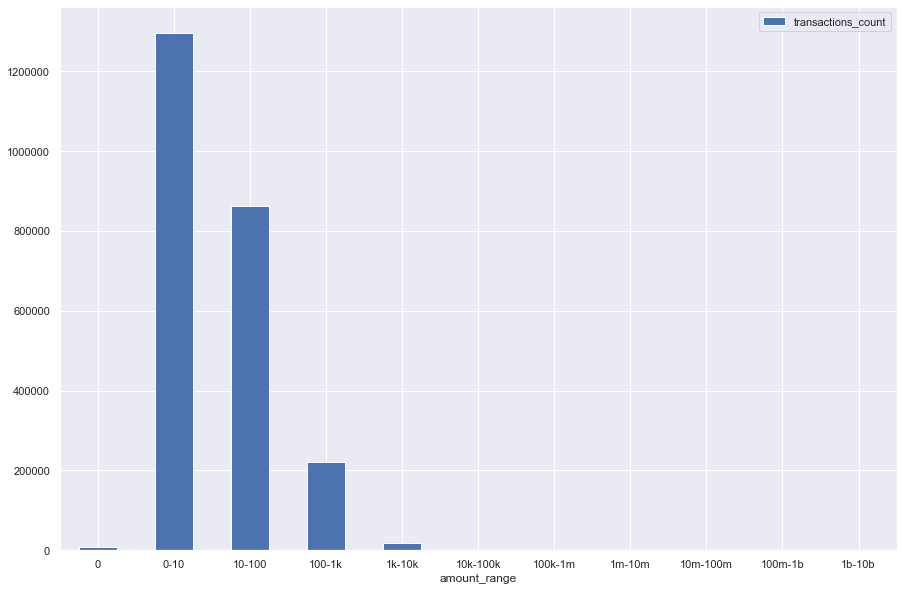

In [12]:
completed_transactions_df = transactions_df[transactions_df['transactions_state'] == 'COMPLETED']

print(f'Descriptive statistics of COMPLETED transaction amounts:')
print(completed_transactions_df['amount_usd'].describe())

# Count of COMPLETED with amount bins
total_completed_transactions_count = completed_transactions_df['transaction_id'].nunique()
zero_amount_completed_transactions_count = completed_transactions_df[completed_transactions_df['amount_usd'] == 0.0]['transaction_id'].nunique()
amount_between_0_and_10_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] > 0.0) & (completed_transactions_df['amount_usd'] < 10.0) ]['transaction_id'].nunique()
amount_between_10_and_100_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 10.0) & (completed_transactions_df['amount_usd'] < 100.0) ]['transaction_id'].nunique()
amount_between_100_and_1000_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 100.0) & (completed_transactions_df['amount_usd'] < 1000.0) ]['transaction_id'].nunique()
amount_between_1000_and_10000_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 1000.0) & (completed_transactions_df['amount_usd'] < 10000.0) ]['transaction_id'].nunique()
amount_between_10000_and_100000_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 10000.0) & (completed_transactions_df['amount_usd'] < 100000.0) ]['transaction_id'].nunique()
amount_between_100000_and_1000000_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 100000.0) & (completed_transactions_df['amount_usd'] < 1000000.0) ]['transaction_id'].nunique()
amount_between_1000000_and_10000000_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 1000000.0) & (completed_transactions_df['amount_usd'] < 10000000.0) ]['transaction_id'].nunique()
amount_between_10000000_and_100000000_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 10000000.0) & (completed_transactions_df['amount_usd'] < 100000000.0) ]['transaction_id'].nunique()
amount_between_100000000_and_1000000000_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 100000000.0) & (completed_transactions_df['amount_usd'] < 1000000000.0) ]['transaction_id'].nunique()
amount_between_1000000000_and_10000000000_completed_transactions_count = completed_transactions_df[(completed_transactions_df['amount_usd'] >= 1000000000.0) & (completed_transactions_df['amount_usd'] < 10000000000.0) ]['transaction_id'].nunique()

print(f'\nNote: Percentage values are relative to total count of COMPLETED transactions')
print(f'\nTotal Completed Transactions: {total_completed_transactions_count} ({"{:.3f}".format(100.*(float(total_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with amount = 0: {zero_amount_completed_transactions_count} ({"{:.3f}".format(100.*(float(zero_amount_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 0 < amount < 10: {amount_between_0_and_10_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_0_and_10_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 10 <= amount < 100 : {amount_between_10_and_100_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_10_and_100_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 100 <= amount < 1k : {amount_between_100_and_1000_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_100_and_1000_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 1k <= amount < 10k : {amount_between_1000_and_10000_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_1000_and_10000_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 10k <= amount < 100k : {amount_between_10000_and_100000_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_10000_and_100000_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 100k <= amount < 1m : {amount_between_100000_and_1000000_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_100000_and_1000000_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 1m <= amount < 10m : {amount_between_1000000_and_10000000_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_1000000_and_10000000_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 10m <= amount < 100m : {amount_between_10000000_and_100000000_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_10000000_and_100000000_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 100m <= amount < 1b : {amount_between_100000000_and_1000000000_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_100000000_and_1000000000_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')
print(f'\nTransactions with 1b <= amount < 10b : {amount_between_1000000000_and_10000000000_completed_transactions_count} ({"{:.4f}".format(100.*(float(amount_between_1000000000_and_10000000000_completed_transactions_count)/ float(total_completed_transactions_count)))}%)')

# Plot histogram of COMPLETED transaction amount bins
completed_transaction_amount_bins = dict()
completed_transaction_amount_bins['0'] = zero_amount_completed_transactions_count
completed_transaction_amount_bins['0-10'] = amount_between_0_and_10_completed_transactions_count
completed_transaction_amount_bins['10-100'] = amount_between_10_and_100_completed_transactions_count
completed_transaction_amount_bins['100-1k'] = amount_between_100_and_1000_completed_transactions_count
completed_transaction_amount_bins['1k-10k'] = amount_between_1000_and_10000_completed_transactions_count
completed_transaction_amount_bins['10k-100k'] = amount_between_10000_and_100000_completed_transactions_count
completed_transaction_amount_bins['100k-1m'] = amount_between_100000_and_1000000_completed_transactions_count
completed_transaction_amount_bins['1m-10m'] = amount_between_1000000_and_10000000_completed_transactions_count
completed_transaction_amount_bins['10m-100m'] = amount_between_10000000_and_100000000_completed_transactions_count
completed_transaction_amount_bins['100m-1b'] = amount_between_100000000_and_1000000000_completed_transactions_count
completed_transaction_amount_bins['1b-10b'] = amount_between_1000000000_and_10000000000_completed_transactions_count

completed_transaction_amount_bins_data = {'amount_range': list(completed_transaction_amount_bins.keys()), 'transactions_count': list(completed_transaction_amount_bins.values())}
completed_transaction_amount_bins_df = pd.DataFrame.from_dict(completed_transaction_amount_bins_data)
completed_transaction_amount_bins_df.plot.bar(x='amount_range', y='transactions_count', rot=0, figsize=(15,10))

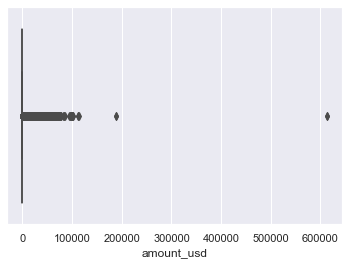

In [13]:
# Box plot for COMPLETED transaction amounts
sns.boxplot(x=completed_transactions_df['amount_usd'])

In [14]:
print(f'COMPLETED Transactions with 10k <= amount < 1m state value counts:')
print(transactions_df[(completed_transactions_df['amount_usd'] >= 10000.0) & (transactions_df['amount_usd'] < 1000000.0) ]['transactions_state'].value_counts())

COMPLETED Transactions with 10k <= amount < 1m state value counts:
COMPLETED    989
Name: transactions_state, dtype: Int64


- Transactions with 0 < amount < 10: 1296722 (53.8513%) and Transactions with 10 <= amount < 100 : 863246 (35.8496%) constitute the major chunk of COMPLETED transactions. Note: Percentage values are relative to total count of COMPLETED transactions.

- 989 of COMPELTED transactions exist with 10k <= amount < 1m and 11 of these transactions exist with 100k <= amount < 1m with the largest COMPLETED transaction amounting to ~600k (612766.460).

## Users

users.csv

a table of user data
- user_id : string uniquely identifying the user
- birth_year : integer corresponding to the user’s birth year
- country : two letter string corresponding to the user’s country of residence
- city : two string corresponding to the user’s city of residence
- created_date : datetime corresponding to the user’s created date
- user_settings_crypto_unlocked : integer indicating if the user has unlocked the crypto currencies in the app
- plan : string indicating on which plan the user is on
- attributes_notifications_marketing_push : float indicating if the user has accepted to receive marketing push notifications
- attributes_notifications_marketing_email : float indicating if the user has accepted to receive marketing email notifications
- num_contacts : integer corresponding to the number of contacts the user has on Revolut
- num_referrals : integer corresponding to the number of users referred by the selected user
- num_successful_referrals : integer corresponding to the number of users successfully referred by the selected user (successfully means users who have actually installed the app and are able to use the product)

In [15]:
print(f'Users Dataframe:')
display_df_stats(users_df)
users_df.head()

Users Dataframe:

Shape: (19430, 12)

Columns: 
Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals'],
      dtype='object')

Column Datatypes: 
user_id                                             string
birth_year                                           int32
country                                             string
city                                                string
created_date                                datetime64[ns]
user_settings_crypto_unlocked                        int32
plan                                                string
attributes_notifications_marketing_push            float64
attributes_notifications_marketing_email           float64
num_contacts                                         int32
num_referrals                      

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,0,0
1,user_1,1975,GB,London,2018-01-29 03:38:46.676876,0,STANDARD,nan,nan,21,0,0
2,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,STANDARD,0.000,0.000,21,0,0
3,user_3,1994,FR,Paris,2018-01-15 18:47:56.723104,0,STANDARD,1.000,0.000,0,0,0
4,user_4,1985,GB,Beckenham,2018-01-11 00:36:46.673673,0,STANDARD,nan,nan,2,0,0


In [12]:
users_profile = ProfileReport(users_df, title='Users Pandas Profiling Report', html={'style':{'full_width':True}})

users_profile.to_file(output_file="Users_Pandas_Profiling_Report.html")

users_profile.to_notebook_iframe()

**Observations**

- Total count of unique users is 19430. All 19430 have device records. 121813 unique users have notification records. 18766 unique users have transaction records. 

- Minimum birth year is 1929 and maximum birth year is 2001. Assuming 2019 to be the current year as seen from transactions data, the minimum of users ranges from 18 to 90 years.

- Number of distinct countries for users is 41. For transactions data, 198 unique ea merchant countries exist.

- Number of distinct cities for users is 6049. For transactions data, 63253 unique ea merchant cities exist. City names are much cleaner in users data.

- Earliest user created date is 2018-01-01. Same goes for earliest transaction created date. Earliest notification created date is 2018-01-10.

- A considerable chunk (18.1%) of users have crypto settings unlocked while all the rest of the users have these settings locked.

- Majority of the users have STANDARD (92.6%) plan.

- There are a lot of missing values for user acceptance to receiving marketing push notifications (34.0%).

- There are a lot of missing values for user acceptance to receiving marketing email notifications (34.0%).

- A considerable chunk (35.9%) of users have zero contacts while there exist users having high number of contacts with the maximum being 2918 contacts.

- None of the users have neither made any referrals nor have a non zero count of successful referrals.

# Questions

## Question 2.

**2. Define a target metric to measure user engagement. How would you define an engaged vs. unengaged user?**

**a. Please provide the business justification and associated visualisations / rationale in choosing your definition of engagement**

**Answer**

A combination of following four metrics could be used to measure user engagement:

1) Frequency of spending - Users who are spending more frequently are potentially more engaged while those who do who do it less frequently or don't do so are potentially less engaged or unengaged.

2) Average spending amount - Users with higher average spending amounts are potentially more engaged while those with lower average spending amounts are potentially less engaged or unengaged.

3) Time since last transaction - Users who haven't made a transaction since quite some time are potentially less engaged or unegaged, while those who have made a transaction recently are potentially engaged. (This seems to be the most important metric.)

4) Time since joining - Users who have been there for a longer time are more likely to churn (become unengaged).

In [16]:
# Function to aggregate dataframe features for analysis
# Note: Considering only COMPLETED transactions
def agg_features(df):
    end_day = max(df.created_date_y)
    
    agg_df = df[df['transactions_state'] == 'COMPLETED'].groupby('user_id').agg(
                # Each user's total spend, mean spend, frequency, time of most recent transaction
                amount_usd_total = ('amount_usd', 'sum'),
                amount_usd_mean = ('amount_usd', 'mean'),
                frequency_spend = ('amount_usd', 'count'),
                min_transcation_date = ('created_date_y', 'min'),
                max_transcation_date = ('created_date_y', 'max'),
                created_date = ('created_date_x', 'min'))   

    agg_df['time_since_last_transcation'] = (end_day - agg_df.max_transcation_date).astype('timedelta64[D]')
    agg_df['time_since_start'] = (agg_df.max_transcation_date - agg_df.created_date).astype('timedelta64[D]')
    agg_df['time_since_first_transcation'] = (agg_df.max_transcation_date - agg_df.min_transcation_date).astype('timedelta64[D]')
    return agg_df

# Merging users and transactions dataframes
users_transactions_df = pd.merge(users_df, transactions_df, on='user_id')

# Aggregate features
agg_df = agg_features(users_transactions_df)
display_df_stats(agg_df)
agg_df.head()


Shape: (18529, 9)

Columns: 
Index(['amount_usd_total', 'amount_usd_mean', 'frequency_spend',
       'min_transcation_date', 'max_transcation_date', 'created_date',
       'time_since_last_transcation', 'time_since_start',
       'time_since_first_transcation'],
      dtype='object')

Column Datatypes: 
amount_usd_total                       float64
amount_usd_mean                        float64
frequency_spend                          int64
min_transcation_date            datetime64[ns]
max_transcation_date            datetime64[ns]
created_date                    datetime64[ns]
time_since_last_transcation            float64
time_since_start                       float64
time_since_first_transcation           float64
dtype: object

Descriptive Statistics:
        amount_usd_total  amount_usd_mean  frequency_spend  \
count          18529.000        18529.000        18529.000   
unique               nan              nan              nan   
top                  nan              nan     

,amount_usd_total,amount_usd_mean,frequency_spend,min_transcation_date,max_transcation_date,created_date,time_since_last_transcation,time_since_start,time_since_first_transcation
user_id,,,,,,,,,
user_0,12648.600,36.139,350,2018-01-16 23:24:18.666466,2019-05-02 03:38:44.690466,2018-01-13 05:15:15.599466,14.000,473.000,470.000
user_1,5705.350,50.047,114,2018-01-31 09:13:58.795876,2019-02-24 21:25:15.962876,2018-01-29 03:38:46.676876,80.000,391.000,389.000
user_10,24508.380,28.970,846,2018-01-04 08:09:47.823282,2019-05-11 11:01:00.564282,2018-01-04 08:05:15.466282,5.000,492.000,492.000
user_100,16106.180,146.420,110,2018-01-15 16:39:14.747386,2019-05-07 13:00:24.319386,2018-01-15 08:42:17.099386,9.000,477.000,476.000
user_1000,20128.310,575.095,35,2018-01-06 14:26:51.752706,2018-06-26 05:00:42.236706,2018-01-06 14:21:52.165706,324.000,170.000,170.000


(array([1.8513e+04, 9.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.       ,  5338.8961875, 10677.792375 , 16016.6885625,
        21355.58475  , 26694.4809375, 32033.377125 , 37372.2733125,
        42711.1695   , 48050.0656875, 53388.961875 ]),
 <a list of 10 Patch objects>)

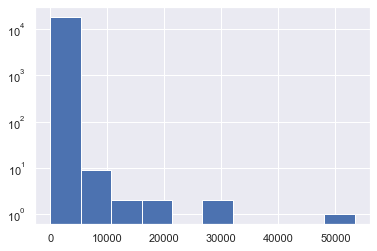

In [17]:
# Distribution of average spend per customer
plt.hist(agg_df.amount_usd_mean, log=True)

(array([1.8503e+04, 1.8000e+01, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([      0.   ,  320668.297,  641336.594,  962004.891, 1282673.188,
        1603341.485, 1924009.782, 2244678.079, 2565346.376, 2886014.673,
        3206682.97 ]),
 <a list of 10 Patch objects>)

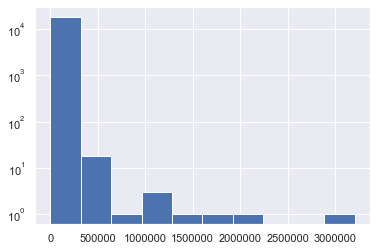

In [18]:
# Distribution of total spend per user
plt.hist(agg_df.amount_usd_total, log=True) 

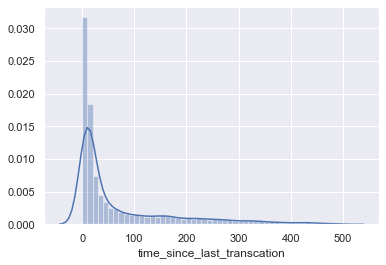

In [19]:
# Distribution of time since last transcation
sns.distplot(agg_df.time_since_last_transcation);

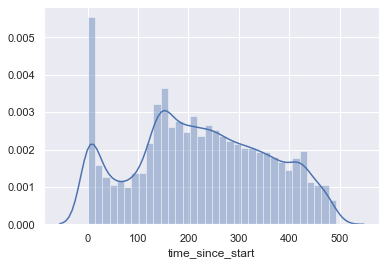

In [20]:
# Distribution of time since start
sns.distplot(agg_df.time_since_start)

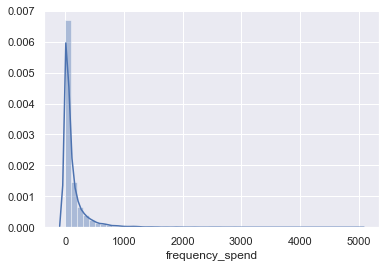

In [21]:
# Distribution of frequency of spending
sns.distplot(agg_df.frequency_spend)

## Question 3.

**3. Using your logic from above, build a model (heuristic/statistical/ML) to classify engaged and unengaged users**

**a. Note that features which are directly correlated with your target metric could lead to overfitting**

**Answer**

We could build a heuristic model using one of the target metrics (time since last transaction) or build a clustering model to segment/classify the customers into distinct groups using the four metrics mentioned above.

**Heuristic model**

Apply a threshold of 50 days on the time since last transcation distribution. Everything to the left of the threshold would be the active users and everything to the right would be the inactive users.

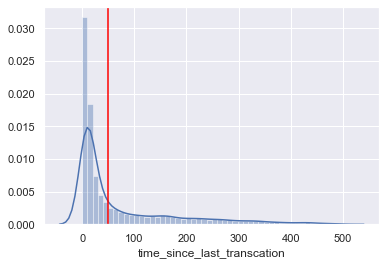

In [22]:
# set a threshold at 50 days
sns.distplot(agg_df.time_since_last_transcation)
plt.axvline(50, color='red')

In [23]:
agg_df.describe()

,amount_usd_total,amount_usd_mean,frequency_spend,time_since_last_transcation,time_since_start,time_since_first_transcation
count,18529.000,18529.000,18529.000,18529.000,18529.000,18529.000
mean,8374.985,89.538,129.957,73.519,224.680,208.953
std,41928.707,602.553,228.090,103.289,131.927,132.661
min,0.000,0.000,1.000,0.000,0.000,0.000
25%,400.000,15.669,13.000,7.000,134.000,113.000
50%,2171.360,33.263,50.000,20.000,220.000,204.000
75%,6970.300,65.870,143.000,102.000,328.000,311.000
max,3206682.970,53388.962,4996.000,497.000,493.000,493.000


<function matplotlib.pyplot.show(*args, **kw)>

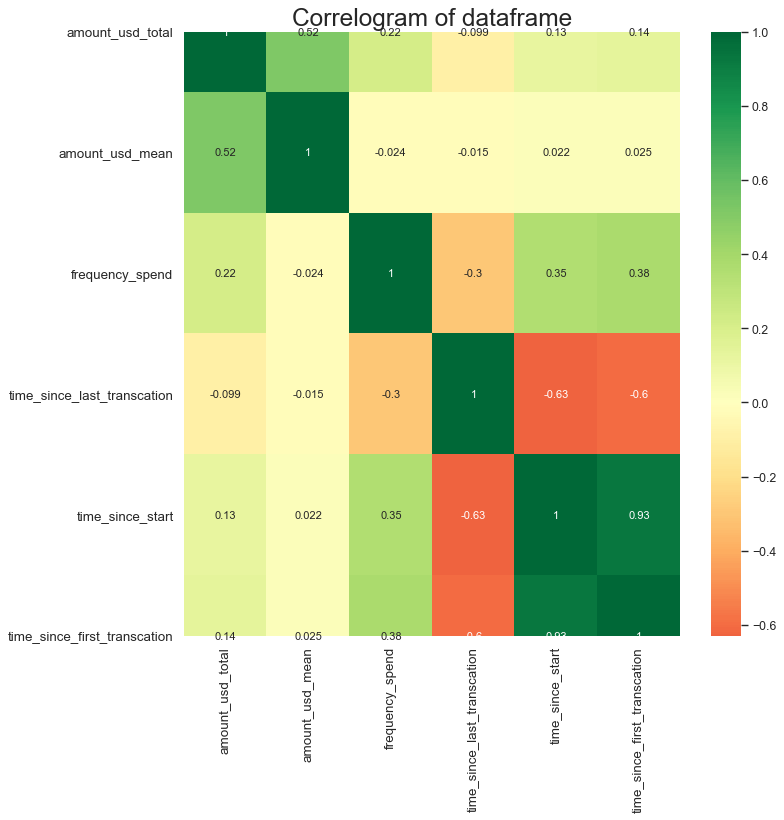

In [25]:
# Plot a correlogram
plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(agg_df.corr(), xticklabels=agg_df.corr().columns, yticklabels=agg_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of dataframe', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show

In [26]:
agg_df.head()

,amount_usd_total,amount_usd_mean,frequency_spend,min_transcation_date,max_transcation_date,created_date,time_since_last_transcation,time_since_start,time_since_first_transcation
user_id,,,,,,,,,
user_0,12648.600,36.139,350,2018-01-16 23:24:18.666466,2019-05-02 03:38:44.690466,2018-01-13 05:15:15.599466,14.000,473.000,470.000
user_1,5705.350,50.047,114,2018-01-31 09:13:58.795876,2019-02-24 21:25:15.962876,2018-01-29 03:38:46.676876,80.000,391.000,389.000
user_10,24508.380,28.970,846,2018-01-04 08:09:47.823282,2019-05-11 11:01:00.564282,2018-01-04 08:05:15.466282,5.000,492.000,492.000
user_100,16106.180,146.420,110,2018-01-15 16:39:14.747386,2019-05-07 13:00:24.319386,2018-01-15 08:42:17.099386,9.000,477.000,476.000
user_1000,20128.310,575.095,35,2018-01-06 14:26:51.752706,2018-06-26 05:00:42.236706,2018-01-06 14:21:52.165706,324.000,170.000,170.000


In [27]:
# Get total spend, frequency, and time since last purchase
values = agg_df.iloc[:, [0, 2, 7, 8]].values

In [28]:
X = preprocessing.normalize(values)

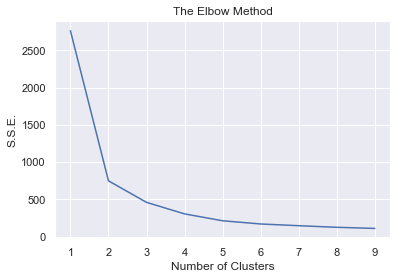

In [29]:
distortions = []
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 23)
    kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)
    
plt.plot(K, distortions)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("S.S.E.")
plt.show()

It is plausible that there are three clusters of users.

In [30]:
kmeansModel = KMeans(n_clusters = 3, init = 'k-means++', random_state = 23)
kmeansModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

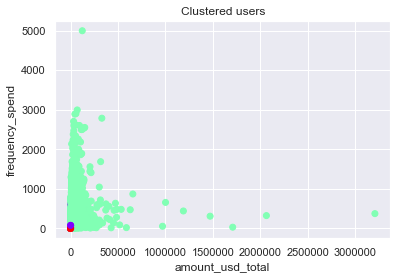

In [31]:
plt.scatter(values[:,0], values[:,1], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("amount_usd_total")
plt.ylabel("frequency_spend")
plt.show()

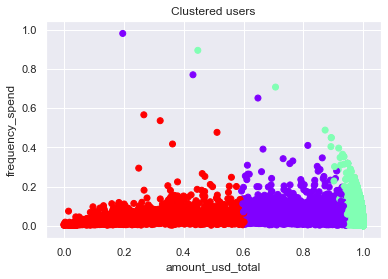

In [32]:
plt.scatter(X[:,0], X[:,1], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("amount_usd_total")
plt.ylabel("frequency_spend")
plt.show()

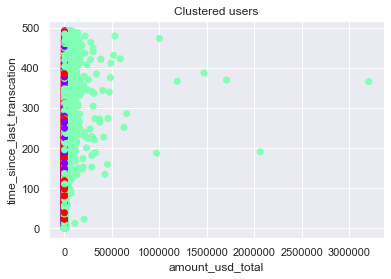

In [33]:
plt.scatter(values[:,0], values[:,2], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("amount_usd_total")
plt.ylabel("time_since_last_transcation")
plt.show()

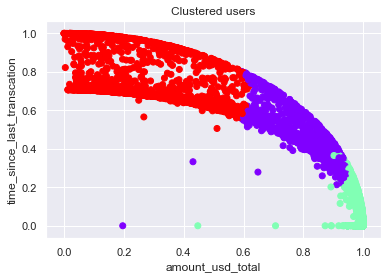

In [34]:
plt.scatter(X[:,0], X[:,2], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("amount_usd_total")
plt.ylabel("time_since_last_transcation")
plt.show()

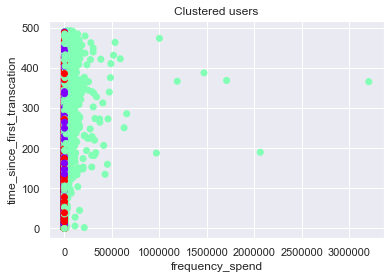

In [35]:
plt.scatter(values[:,0], values[:,3], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("frequency_spend")
plt.ylabel("time_since_first_transcation")
plt.show()


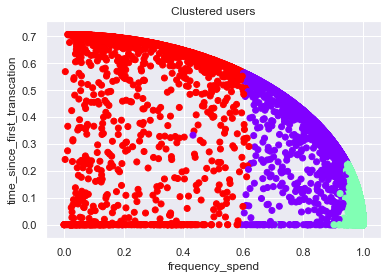

In [36]:
plt.scatter(X[:,0], X[:,3], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("frequency_spend")
plt.ylabel("time_since_first_transcation")
plt.show()

**Clustering Model Groups**

From the diagram above, we can cluster the users into three groups:

1) Light Blue - Users who are highly engaged/ new users - high volumes of transcations, recently joined and have spent the most in their transcations.

2) Purple - Users who are having medium engagement - still relatively high volumes, however, they tend to have been a user for longer time and it has been a while since they have done their last transcation.

3) Red - Unengaged users - they tend to have lower volumes of overall transcations, have spent less amounts overall on those transcations and it has been a long time since their last transcation. Lastly, they also seem have the widest range of users since their first transcation.

One of the important inferences that we can also state is that it's easy to keep new users extremely engaged but it's very difficult to identify a potentially unengaged user accuractely, let alone execute a business action to try and convert them to an engaged user.

## Question 4.

**Let’s assume an unengaged user is a churned user. Now suppose we use your model to identify unengaged users and implement some business actions try to convert them to
engaged users (commonly known as reducing churn)**

**a. How would you set up a test/experiment to check whether we are actually reducing churn?**

**Answer**

If a business action was implemented to try and convert unengaged users to engaged ones, one way to measure whether the effect of that action would be to run a randomised A/B test as well as use cohort analysis to help get a full picture of both the macro and micro view. Let's assume that this business action is to send a push notification to user devices.

To run an A/B test, you would first:

- Pick the target variable, that is, whether the user is engaged or not.

- Set up the hypothesis and null hypothesis, that is, hypothesis is that it will lead to a x% (~5%) conversion of unengaged users to engaged users.

- Identify the total population of unengaged users and the size of the sample we would like to select for the experiment.

- Then we would identify how long we would need to run the experiment from looking at the transcation volumes and determining a satisfactory confidence interval.

- Determine a randomised control group and an experiment group from the sample - which users to send notifactions to in the experiment group while not sending anything to the users in the other.

- Run the experiment for the entire period and then determine if the users in the control group have become more engaged using the target metrics.

Then on a macro view, we could use the cohort in which we will choose to run the experiment to determine how it develops over time. If there is a significant improvement in the retention within the cohort compare to the other cohorts then we will know that it is working.

In [37]:
users_transactions_df.head()

,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,...,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,created_date_y
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,EXCHANGE,GBP,2.120,COMPLETED,<NA>,nan,<NA>,<NA>,OUTBOUND,2018-06-19 01:36:43.065466
1,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,EXCHANGE,SGD,27.900,COMPLETED,<NA>,nan,<NA>,<NA>,OUTBOUND,2018-06-25 03:51:25.977466
2,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,CARD_PAYMENT,USD,8.340,COMPLETED,TRUE,7372.000,1760483369,USA,OUTBOUND,2018-06-19 01:39:43.741466
3,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,CARD_PAYMENT,USD,182.170,COMPLETED,TRUE,8398.000,Lahore,PAK,OUTBOUND,2018-08-04 00:45:28.893466
4,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,CARD_PAYMENT,USD,0.000,REVERTED,FALSE,5968.000,888-283-5051,USA,OUTBOUND,2019-01-25 11:07:06.359466


In [38]:
users_transactions_df['transcation_month'] = users_transactions_df.created_date_y.apply(lambda x: x.strftime('%Y-%m'))

users_transactions_df.set_index('user_id', inplace=True)

users_transactions_df['CohortGroup'] = users_transactions_df.groupby(level=0)['created_date_y'].min().apply(lambda x: x.strftime('%Y-%m'))
users_transactions_df.reset_index(inplace=True)
users_transactions_df.head()

,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,...,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,created_date_y,transcation_month,CohortGroup
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,2.120,COMPLETED,<NA>,nan,<NA>,<NA>,OUTBOUND,2018-06-19 01:36:43.065466,2018-06,2018-01
1,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,27.900,COMPLETED,<NA>,nan,<NA>,<NA>,OUTBOUND,2018-06-25 03:51:25.977466,2018-06,2018-01
2,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,8.340,COMPLETED,TRUE,7372.000,1760483369,USA,OUTBOUND,2018-06-19 01:39:43.741466,2018-06,2018-01
3,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,182.170,COMPLETED,TRUE,8398.000,Lahore,PAK,OUTBOUND,2018-08-04 00:45:28.893466,2018-08,2018-01
4,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.000,1.000,3,...,0.000,REVERTED,FALSE,5968.000,888-283-5051,USA,OUTBOUND,2019-01-25 11:07:06.359466,2019-01,2018-01


In [39]:
grouped = users_transactions_df.groupby(['CohortGroup', 'transcation_month'])

# Aggregate the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'user_id': pd.Series.nunique,
                       'transaction_id': pd.Series.nunique,
                       'amount_usd': np.sum})

cohorts.rename(columns={'user_id': 'TotalUsers',
                        'transaction_id': 'TotalTranscations'}, inplace=True)
cohorts.head()

TotalUsers  TotalTranscations  amount_usd
CohortGroup transcation_month                                           
2018-01     2018-01                   778               6248  905563.360
            2018-02                   533               8872 1261132.460
            2018-03                   501               9303  765091.230
            2018-04                   466               8754  900840.510
            2018-05                   457              10993  638872.890

In [40]:
cohorts.tail()

TotalUsers  TotalTranscations  amount_usd
CohortGroup transcation_month                                           
2019-03     2019-04                    79               1760  148726.510
            2019-05                    58                802   22278.760
2019-04     2019-04                   103                776  146033.260
            2019-05                    52                389   19500.760
2019-05     2019-05                    25                 95    2071.870

In [41]:
# Function to create a 'CohortPeriod' column, which is the Nth period based on the user's first purchase, that is, the sequential month number within that CohortGroup
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  TotalTranscations  amount_usd  \
CohortGroup transcation_month                                              
2018-01     2018-01                   778               6248  905563.360   
            2018-02                   533               8872 1261132.460   
            2018-03                   501               9303  765091.230   
            2018-04                   466               8754  900840.510   
            2018-05                   457              10993  638872.890   

                               CohortPeriod  
CohortGroup transcation_month                
2018-01     2018-01                       1  
            2018-02                       2  
            2018-03                       3  
            2018-04                       4  
            2018-05                       5

In [42]:
cohorts.tail()

TotalUsers  TotalTranscations  amount_usd  \
CohortGroup transcation_month                                              
2019-03     2019-04                    79               1760  148726.510   
            2019-05                    58                802   22278.760   
2019-04     2019-04                   103                776  146033.260   
            2019-05                    52                389   19500.760   
2019-05     2019-05                    25                 95    2071.870   

                               CohortPeriod  
CohortGroup transcation_month                
2019-03     2019-04                       2  
            2019-05                       3  
2019-04     2019-04                       1  
            2019-05                       2  
2019-05     2019-05                       1

In [43]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# Find the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2018-01     778
2018-02     768
2018-03    1694
2018-04    1021
2018-05    1431
Name: TotalUsers, dtype: int64

In [44]:
cohort_group_size.tail()

CohortGroup
2019-01    424
2019-02    155
2019-03    116
2019-04    103
2019-05     25
Name: TotalUsers, dtype: int64

In [45]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
CohortPeriod,,,,,,,,,,,,,,,,,
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,0.685,0.750,0.619,0.731,0.710,0.697,0.744,0.731,0.728,0.699,0.706,0.692,0.679,0.665,0.681,0.505,nan
3,0.644,0.652,0.602,0.672,0.661,0.642,0.646,0.658,0.662,0.674,0.663,0.641,0.675,0.658,0.500,nan,nan
4,0.599,0.630,0.581,0.627,0.635,0.604,0.589,0.641,0.633,0.653,0.641,0.632,0.670,0.471,nan,nan,nan
5,0.587,0.613,0.571,0.617,0.607,0.573,0.587,0.622,0.621,0.621,0.656,0.620,0.460,nan,nan,nan,nan
6,0.595,0.586,0.589,0.581,0.593,0.558,0.586,0.615,0.616,0.646,0.648,0.467,nan,nan,nan,nan,nan
7,0.585,0.605,0.583,0.585,0.574,0.568,0.577,0.597,0.637,0.640,0.488,nan,nan,nan,nan,nan,nan
8,0.554,0.608,0.590,0.586,0.586,0.558,0.566,0.627,0.627,0.506,nan,nan,nan,nan,nan,nan,nan
9,0.541,0.574,0.583,0.566,0.565,0.560,0.599,0.614,0.490,nan,nan,nan,nan,nan,nan,nan,nan


In [46]:
user_retention.tail(10)

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
CohortPeriod,,,,,,,,,,,,,,,,,
8,0.554,0.608,0.590,0.586,0.586,0.558,0.566,0.627,0.627,0.506,nan,nan,nan,nan,nan,nan,nan
9,0.541,0.574,0.583,0.566,0.565,0.560,0.599,0.614,0.490,nan,nan,nan,nan,nan,nan,nan,nan
10,0.528,0.573,0.586,0.572,0.574,0.583,0.614,0.489,nan,nan,nan,nan,nan,nan,nan,nan,nan
11,0.539,0.568,0.591,0.554,0.616,0.581,0.458,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
12,0.535,0.582,0.591,0.598,0.597,0.454,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
13,0.542,0.561,0.603,0.596,0.465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
14,0.542,0.573,0.599,0.453,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
15,0.549,0.581,0.452,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
16,0.545,0.473,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


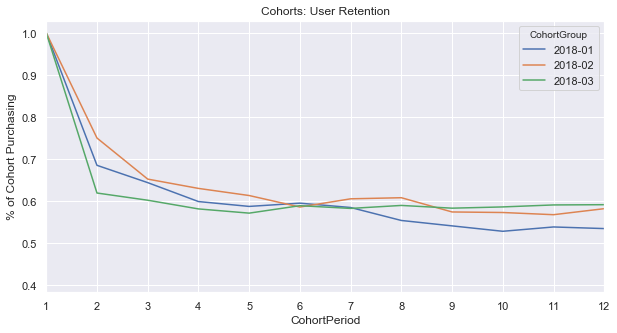

In [47]:
user_retention[['2018-01', '2018-02', '2018-03']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

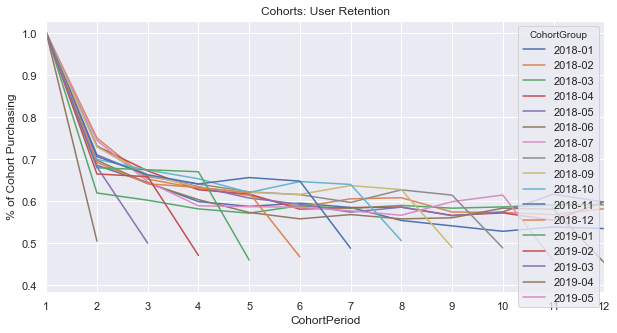

In [48]:
user_retention.plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

**Cohort Analysis**

From the diagram above, we can observe that the graph is showing how users are broken into cohorts from their first trancation, and how at the start of that cohort period most of the users make a transcation. However, over time, users in those cohorts slow drop out or dont make any more transcations.

When rolling out the experiment, we could test overall engagement by monitoring changes in cohort behaviour to see if there is an incremental improvement over time.

**b. What metrics and techniques would you use to assess the impact of the business action?**

**Answer**

We will use the decrease in time since last transcation as our metric with the idea that users who are unengaged haven't made a purchase over 50 days.

More specifically, we'll investigate whether there is a change in the mean of days since the last transaction from the experiment group before the business action is executed.

We can quickly check whether the two means are equal (hypothesis) or not equal (null hypothesis) with the help of 2 sample t-test.

The results will show us if the two means are different or indifferent.

If the group mean of time since users' last transcation appears has went higher, it would mean that the business action that was implemented is not very effective.